<a href="https://colab.research.google.com/github/rajasreekalli/datascience-dojo/blob/main/Linear_Regression_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# import the dataset
df = pd.read_csv('/content/drive/MyDrive/Boston_Housing_from_Sklearn.csv')
df

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,21.0,9.67,22.4
502,0.04527,0.573,6.120,76.7,21.0,9.08,20.6
503,0.06076,0.573,6.976,91.0,21.0,5.64,23.9
504,0.10959,0.573,6.794,89.3,21.0,6.48,22.0


In [3]:
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


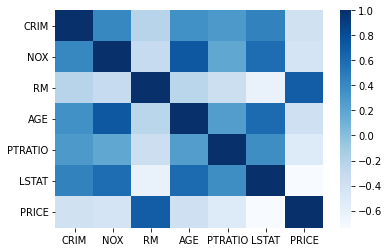

In [7]:
# 1. Make a heatmap of the correlations.  Identify any features that have a correlation coefficient of 0.5 or greater with price.   We will limit our analysis to these three features.
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues');

In [10]:
# 2. Select columns for your feature matrix (X) and select PRICE for your target vector (y).
feature_names = ['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT']
df.loc[:, feature_names]

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT
0,0.00632,0.538,6.575,65.2,15.3,4.98
1,0.02731,0.469,6.421,78.9,17.8,9.14
2,0.02729,0.469,7.185,61.1,17.8,4.03
3,0.03237,0.458,6.998,45.8,18.7,2.94
4,0.06905,0.458,7.147,54.2,18.7,5.33
...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,21.0,9.67
502,0.04527,0.573,6.120,76.7,21.0,9.08
503,0.06076,0.573,6.976,91.0,21.0,5.64
504,0.10959,0.573,6.794,89.3,21.0,6.48


In [13]:
# converted into numpy array
X = df.loc[:, feature_names].to_numpy()


In [14]:
X.shape

(506, 6)

In [15]:
# PRICE for target vector
df.loc[:, 'PRICE']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [17]:
y = df.loc[:, 'PRICE'].values
y.shape

(506,)

In [20]:
# 3.Split your data into train and test groups. Please use random number 42 for consistency!
y = df['PRICE']
X = df.drop(columns = 'PRICE')

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
len(X_train)

379

In [24]:
len(X_test)

127

In [25]:
len(y_train)

379

In [26]:
len(y_test)

127

In [33]:
# 4. Instantiate your model and fit it on the training set.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
rain_preds = reg.predict(X_train)

In [32]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.6954015699310794


In [36]:
# 5. Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?
test_preds = reg.predict(X_test)

In [35]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.6356314088765056


Yes. There is difference between the training set and testing set. The difference is o.05977016

In [38]:
# 6. Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.  
from sklearn.metrics import mean_squared_error
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg_model.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test))))


Training RMSE: 5.197337414733305
Testing RMSE: 5.0513059374497615
